In [4]:
!pip install git+https://github.com/ageitgey/face_recognition_models

  Cloning https://github.com/ageitgey/face_recognition_models to c:\users\razat\appdata\local\temp\pip-req-build-maxmksgf
  Resolved https://github.com/ageitgey/face_recognition_models to commit e67de717267507d1e9246de95692eb8be736ab61
  Created wheel for face-recognition-models: filename=face_recognition_models-0.3.0-py2.py3-none-any.whl size=100566232 sha256=e2eb0fc64f59fa0300caf41c4492f46effa2b7e5115a0229983f24c19847139d
  Stored in directory: C:\Users\razat\AppData\Local\Temp\pip-ephem-wheel-cache-dfin980h\wheels\72\77\69\25f6d29e1a73995b935567203e6c9e080302758331575083c8
Successfully built face-recognition-models


  Running command git clone -q https://github.com/ageitgey/face_recognition_models 'C:\Users\razat\AppData\Local\Temp\pip-req-build-maxmksgf'
You should consider upgrading via the 'C:\Python310\python.exe -m pip install --upgrade pip' command.


In [2]:
import cv2
import face_recognition
import matplotlib.pyplot as plt
import numpy as np
import glob

face_cascade = cv2.CascadeClassifier('image_set/haarcascade_frontalface_default.xml')

In [11]:
def take_pictures():
    cap = cv2.VideoCapture(0)
    count = 1
    while True:
        ret, frame = cap.read()
        gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
        if cv2.waitKey(1) & 0xFF == ord('w'):    
            faces = face_recognition.face_locations(frame)  
            print(len(faces))
            if(len(faces) == 1):
                top, right, bottom, left = faces[0]
                face = frame[top:bottom, left:right]
                cv2.imwrite("image_set/razat_" + str(count) + ".jpg", face)
                count += 1
        cv2.imshow('frame', frame)
        if cv2.waitKey(100) & 0xFF == ord('q'):
            break
        elif count >= 100:
            break
    cap.release()
    cv2.destroyAllWindows()

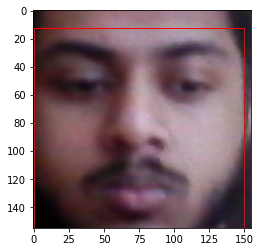

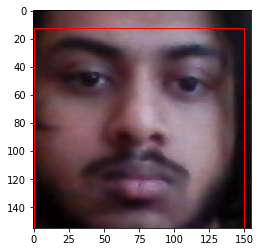

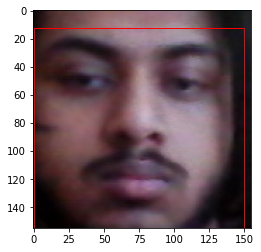

In [12]:
encodings = []
razat = glob.glob("image_set/Razat_train/*")
for img in razat:
    img = face_recognition.load_image_file(img)
    face_loc = face_recognition.face_locations(img)[0]
    face = img[face_loc[0]:face_loc[2], face_loc[3]:face_loc[1]]
    img_enc = np.array(face_recognition.face_encodings(face)[0])
    encodings.append(img_enc)
    plt.imshow(img)
    plt.gca().add_patch(plt.Rectangle((face_loc[3], face_loc[0]), face_loc[1]-face_loc[3], face_loc[2]-face_loc[0], fill=False, color='red'))
    plt.show()

avg_encoding = np.mean(encodings, axis=0)

known_face_encodings = [avg_encoding]
known_face_names = ["Razat"]


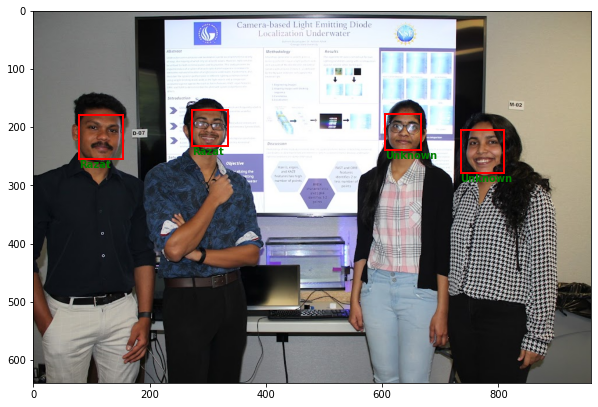

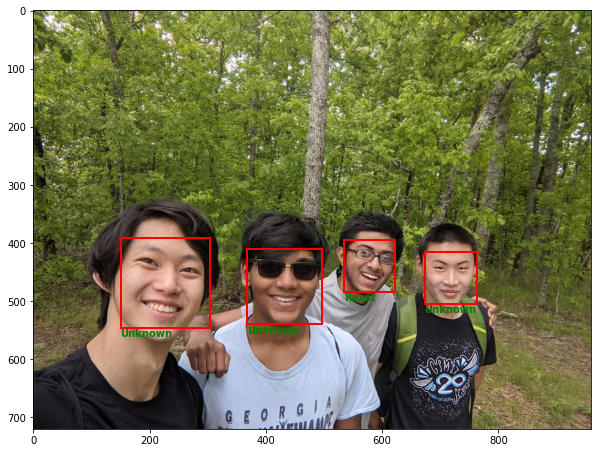

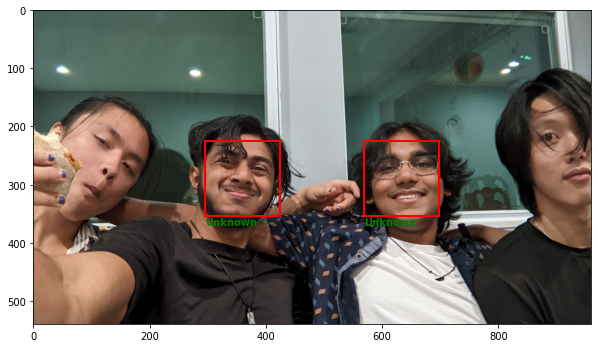

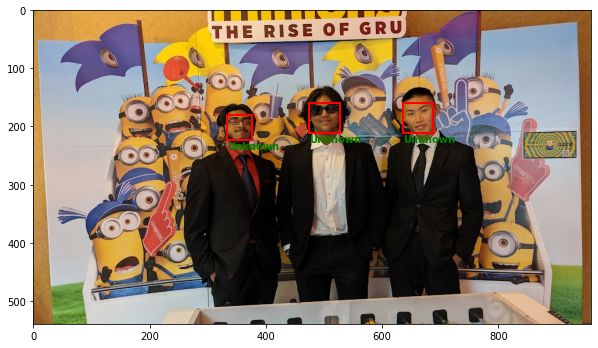

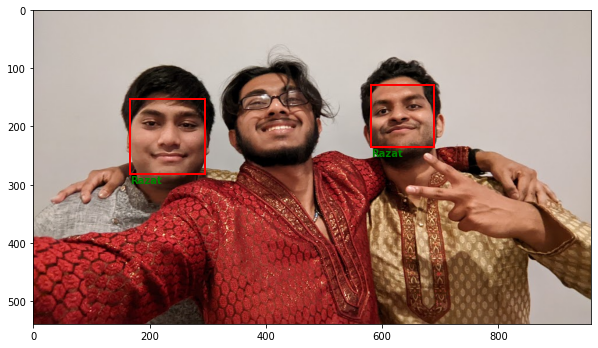

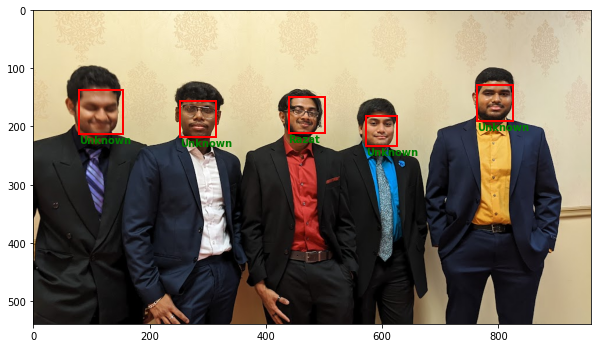

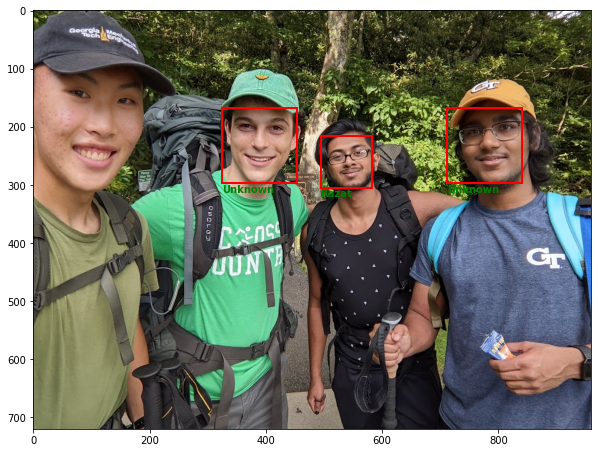

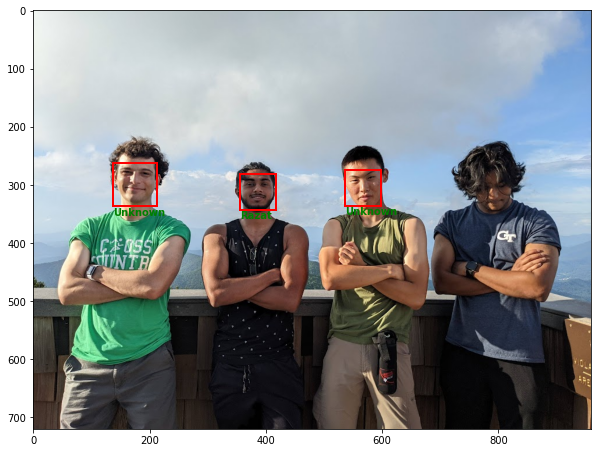

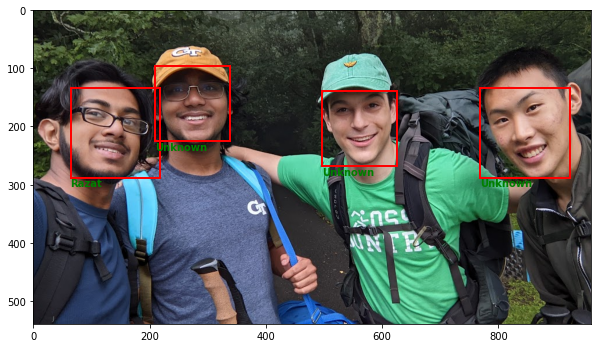

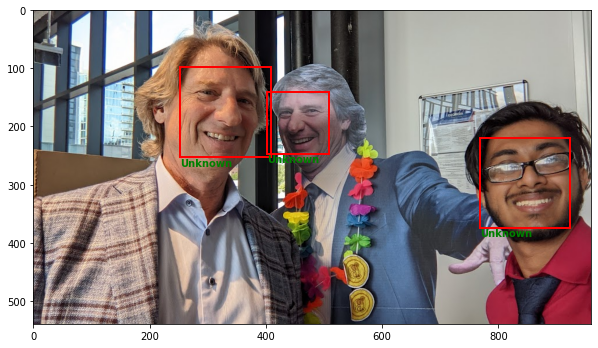

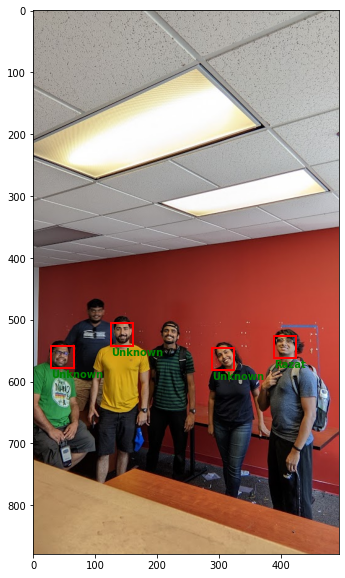

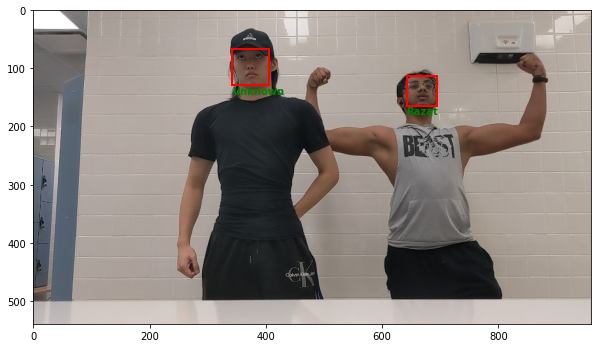

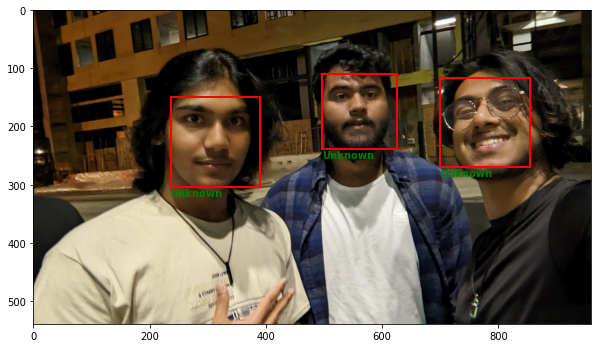

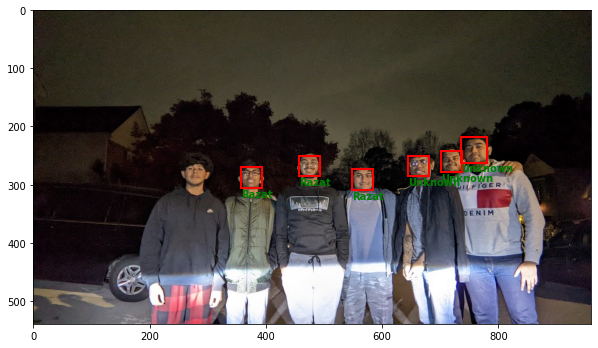

In [13]:
test_img = glob.glob("image_set/Test/*")
for img in test_img:
    img = face_recognition.load_image_file(img)
    faces = face_recognition.face_locations(img)
    plt.figure(figsize=(10,10))
    plt.imshow(img)
    for f in faces:
        top, right, bottom, left = f
        rec = plt.Rectangle((left, top), right - left, bottom - top, color='red', fill=False, linewidth=2)
        plt.gca().add_patch(rec)
        face = img[top:bottom, left:right]
        face_enc = face_recognition.face_encodings(face)
        if(len(face_enc) > 0):
            face_enc = face_enc[0]
            match = face_recognition.compare_faces(known_face_encodings, face_enc)
            name = "Unknown"
            if match[0]:
                name = known_face_names[0]
            plt.gca().text(left, bottom+15, name, color='green', fontsize=10, weight='bold')
        else: 
            plt.gca().text(left, bottom+15, "Unknown", color='green', fontsize=10, weight='bold')
    plt.show()
    
    

In [14]:
cv2.destroyAllWindows()

In [15]:
true_positive = 9
false_positive = 4
true_negative = 30
false_negative = 4

accuracy = (true_positive + true_negative) / (true_positive + true_negative + false_positive + false_negative)
precision = true_positive / (true_positive + false_positive)
recall = true_positive / (true_positive + false_negative)
iou = true_positive / (true_positive + false_positive + false_negative)

print("Accuracy: ", accuracy)
print("Precision: ", precision)
print("Recall: ", recall)
print("IoU: ", iou)

Accuracy:  0.8297872340425532
Precision:  0.6923076923076923
Recall:  0.6923076923076923
IoU:  0.5294117647058824
